In [2]:
# 数据探索
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 载入训练集与数据集
train_data_file = "../zhengqi_train.txt"
test_data_file = "../zhengqi_test.txt"

# 读取数据
train_data = pd.read_csv(train_data_file,sep='\t',encoding='utf-8')
test_data = pd.read_csv(test_data_file,sep='\t',encoding='utf-8')

# 查看集合的所有特征数据大撒东方大厦
train_data.head(10)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384
5,0.445,0.627,0.408,0.220,0.458,-1.056,-1.009,-1.896,0.481,-2.114,...,0.454,0.674,0.358,0.618,-0.843,-0.290,0.364,-0.191,-0.883,0.060
6,0.889,0.416,0.640,0.356,0.224,-0.893,-0.812,-1.823,0.729,-2.114,...,0.454,0.081,0.243,0.468,-0.843,-0.290,0.364,-0.155,-1.318,0.415
7,0.984,0.529,0.704,0.438,0.258,-0.917,-0.682,-1.721,0.753,-2.114,...,0.139,-0.050,0.428,-0.119,-0.843,-0.290,0.364,0.100,-0.899,0.609
8,0.948,0.850,0.584,0.459,0.591,-0.523,-0.591,-1.524,0.763,-2.114,...,0.188,0.467,0.597,-0.057,-0.843,-0.290,0.364,0.053,-0.553,0.981
9,1.157,1.055,0.638,0.617,1.483,-0.731,-0.612,-1.524,0.968,-2.114,...,0.860,0.456,0.916,0.039,-0.843,-0.290,0.364,0.151,-1.157,0.818


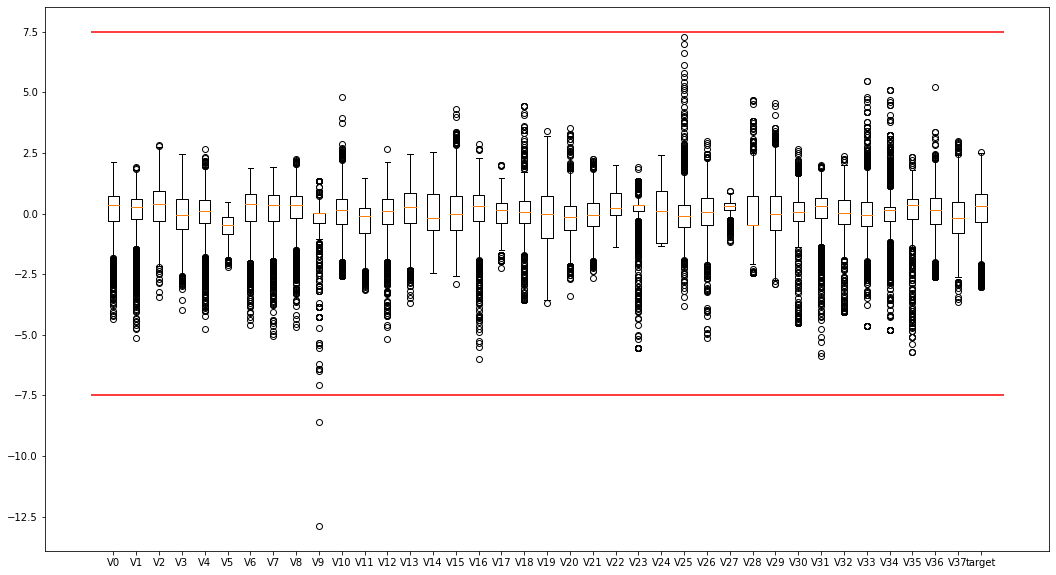

In [3]:
# 绘制各个特征的箱线图
plt.figure(figsize=(18,10))
plt.boxplot(x=train_data.values,labels=train_data.columns) 
plt.hlines([-7.5,7.5],0,40,colors='r')
plt.show()

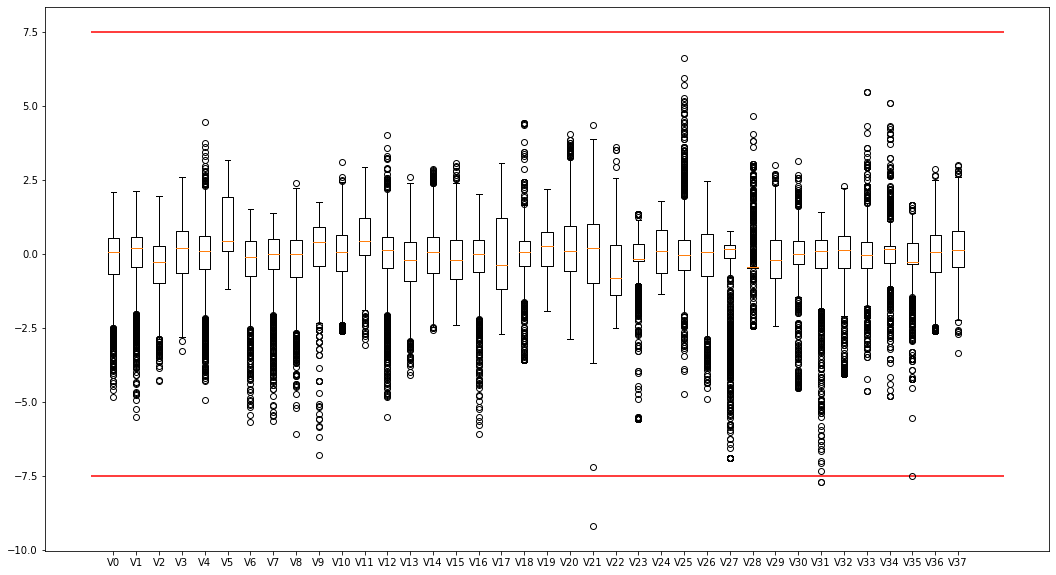

In [4]:
# 绘制各个特征的箱线图
plt.figure(figsize=(18,10))
plt.boxplot(x=test_data.values,labels=test_data.columns) 
plt.hlines([-7.5,7.5],0,40,colors='r')
plt.show()

In [6]:
# 从赛题可以分析出,v9变量存在着很大的特征异常
train_data = train_data[train_data['V9'] > -7.5]
test_data = test_data[test_data['V9'] > -7.5]
display(train_data.describe())
display(test_data.describe())

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


In [7]:
# 最大最小值归一化
from sklearn import preprocessing

features_columns = [col for col in train_data.columns if col not in ['target']]
features_columns

['V0',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37']

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])
# print(min_max_scaler)

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

display(train_data_scaler.describe())
display(test_data_scaler.describe())

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2884.000000
mean,0.690633,0.735633,0.593844,0.606212,0.639787,0.607649,0.735477,0.741354,0.702053,0.821897,...,0.401631,0.634466,0.760495,0.632231,0.459302,0.484489,0.734944,0.336235,0.527608,0.127274
std,0.143740,0.133703,0.145844,0.151311,0.119504,0.193887,0.141896,0.137154,0.129098,0.108362,...,0.141594,0.124279,0.110938,0.139037,0.099799,0.101365,0.122840,0.123663,0.153192,0.983462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626239,0.695703,0.497759,0.515087,0.586328,0.497566,0.659249,0.682314,0.653489,0.794789,...,0.300053,0.587132,0.722593,0.565757,0.409037,0.454490,0.685279,0.279792,0.427036,-0.348500
50%,0.727153,0.766335,0.609155,0.609855,0.652873,0.642456,0.767192,0.774189,0.728557,0.846181,...,0.385611,0.633894,0.782330,0.634770,0.454518,0.499949,0.755580,0.349860,0.519457,0.313000
75%,0.783922,0.812642,0.694422,0.714096,0.712152,0.759266,0.835690,0.837030,0.781029,0.846181,...,0.488121,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414447,0.621870,0.794250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.642905,0.715637,0.477791,0.632726,0.635558,1.130681,0.664798,0.699688,0.637926,0.871534,...,0.313556,0.369132,0.614756,0.719928,0.623793,0.457349,0.482778,0.673164,0.326501,0.577034
std,0.166253,0.152936,0.155176,0.161379,0.154392,0.360555,0.162899,0.149311,0.156540,0.120675,...,0.149752,0.117538,0.156533,0.144621,0.175284,0.098071,0.100537,0.118082,0.132661,0.141870
min,-0.074195,-0.051989,-0.138124,0.106035,-0.024088,0.379633,-0.165817,-0.082831,-0.197059,0.034142,...,0.000000,0.066604,0.000000,-0.233613,-0.000620,0.000000,0.000000,-0.222222,0.000000,0.042836
25%,0.568618,0.663494,0.390845,0.516451,0.571256,0.862598,0.594035,0.651593,0.564653,0.794789,...,0.278919,0.279498,0.579211,0.683816,0.555366,0.412901,0.454490,0.666667,0.256819,0.482353
50%,0.681537,0.755256,0.504641,0.651177,0.654017,0.980532,0.694483,0.727247,0.675796,0.888889,...,0.280045,0.362120,0.627710,0.756987,0.652605,0.454518,0.499949,0.676518,0.342977,0.570437
75%,0.756506,0.811222,0.591869,0.740527,0.720226,1.538750,0.777778,0.798593,0.745856,0.948727,...,0.281593,0.451148,0.688438,0.804116,0.725806,0.500000,0.511365,0.755580,0.415371,0.667722
max,0.996747,1.028693,0.858835,1.022766,1.240345,2.005990,0.943285,0.924777,1.023497,1.051273,...,0.997889,0.792045,1.062535,0.925686,0.985112,1.000000,1.000000,0.918568,0.697043,1.003167


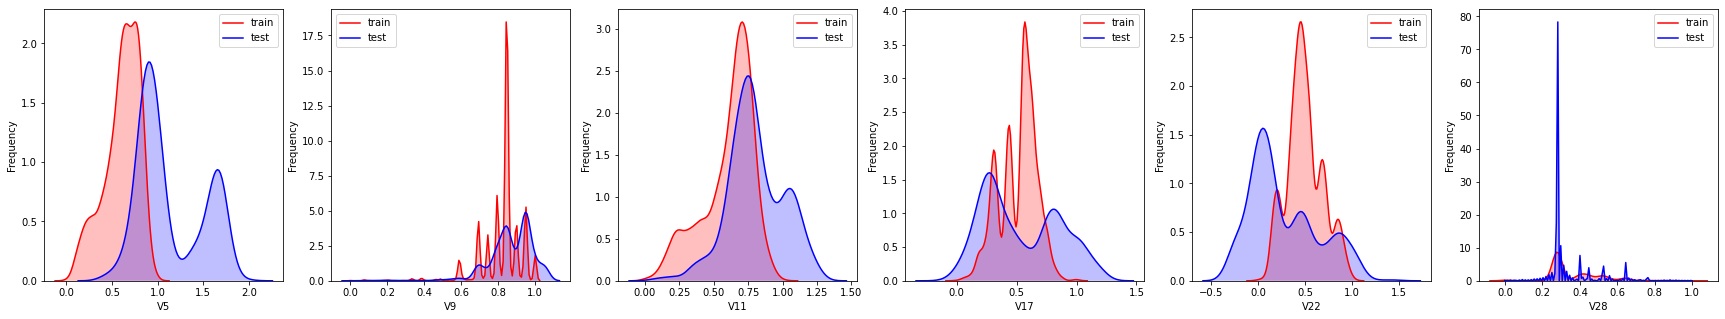

In [14]:
# 根据KDE分布对比，特征变量V5,V9,V11,V17,V22,V28在训练集与测试集中差别较大，会影响模型的泛化能力，故删除这些特征
drop_col = 6
drop_row = 1

plt.figure(figsize=(5 * drop_col,5 * drop_row))

for i , col in enumerate(['V5','V9','V11','V17','V22','V28']):
    ax = plt.subplot(drop_row,drop_col,i+1)
    ax = sns.kdeplot(train_data_scaler[col],color='Red',shade=True)
    ax = sns.kdeplot(test_data_scaler[col],color='Blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
plt.show()

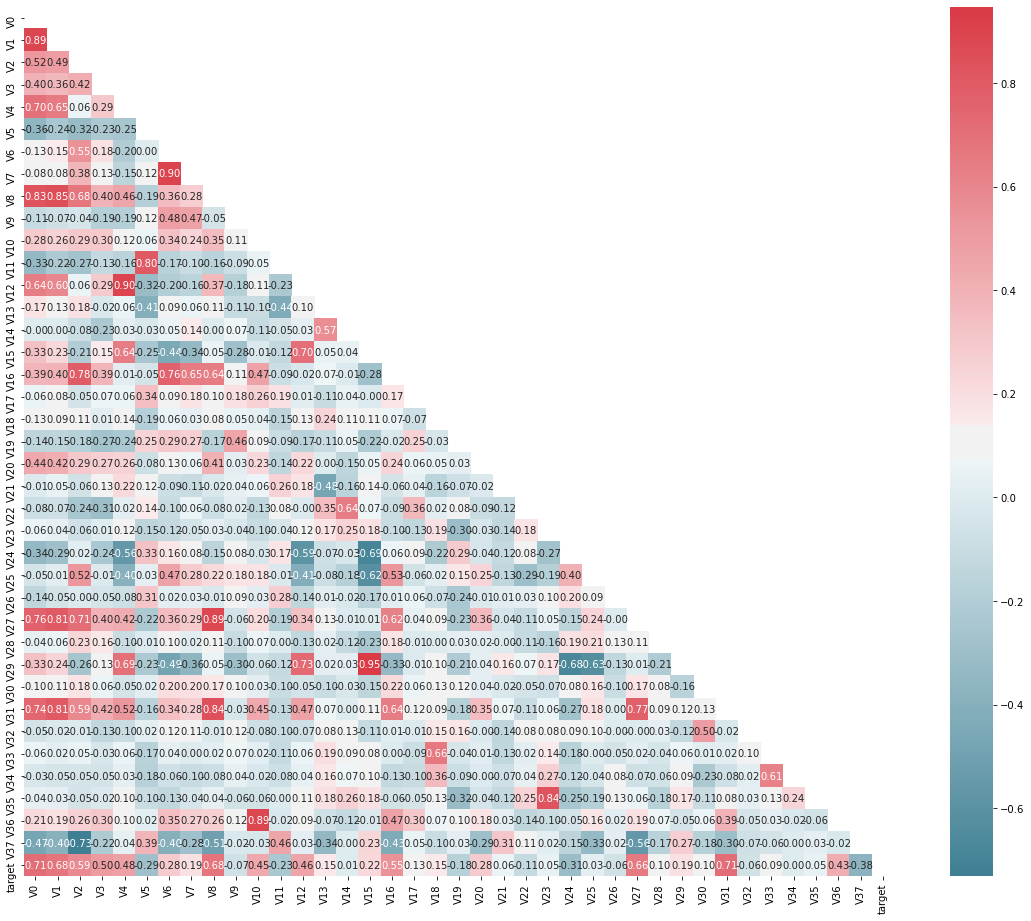

In [18]:
# 计算特征相关性
plt.figure(figsize=(20,16))
column = train_data_scaler.columns.to_list()

mcorr = train_data_scaler[column].corr(method="spearman")
mask = np.zeros_like(mcorr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10,as_cmap=True)
g = sns.heatmap(mcorr,mask=mask,cmap=cmap,square=True,annot=True,fmt='0.2f')
plt.show()

In [19]:
# 计算相关性系数大鱼0.1的特征变量
mcorr=mcorr.abs()
numerical_corr = mcorr[mcorr['target'] > 0.1]['target']
print(numerical_corr.sort_values(ascending=False))

target    1.000000
V0        0.712403
V31       0.711636
V1        0.682909
V8        0.679469
V27       0.657398
V2        0.585850
V16       0.545793
V3        0.501622
V4        0.478683
V12       0.460300
V10       0.448682
V36       0.425991
V37       0.376443
V24       0.305526
V5        0.286076
V6        0.280195
V20       0.278381
V11       0.234551
V15       0.221290
V29       0.190109
V7        0.185321
V19       0.180111
V18       0.149741
V13       0.149199
V17       0.126262
V22       0.112743
V30       0.101378
Name: target, dtype: float64


In [20]:
# 对特征变量进行排序显示
index0 = numerical_corr.sort_values(ascending=False).index
print(train_data_scaler[index0].corr('spearman'))

          target        V0       V31        V1        V8       V27        V2  \
target  1.000000  0.712403  0.711636  0.682909  0.679469  0.657398  0.585850   
V0      0.712403  1.000000  0.739116  0.894116  0.832151  0.763128  0.516817   
V31     0.711636  0.739116  1.000000  0.807585  0.841469  0.765750  0.589890   
V1      0.682909  0.894116  0.807585  1.000000  0.849034  0.807102  0.490239   
V8      0.679469  0.832151  0.841469  0.849034  1.000000  0.887119  0.676417   
V27     0.657398  0.763128  0.765750  0.807102  0.887119  1.000000  0.709534   
V2      0.585850  0.516817  0.589890  0.490239  0.676417  0.709534  1.000000   
V16     0.545793  0.388852  0.642309  0.396122  0.642156  0.620981  0.783643   
V3      0.501622  0.401150  0.420134  0.363749  0.400915  0.402468  0.417190   
V4      0.478683  0.697430  0.521226  0.651615  0.455801  0.424260  0.062134   
V12     0.460300  0.640696  0.471528  0.596173  0.368572  0.336190  0.055734   
V10     0.448682  0.279350  0.445335  0.

In [21]:
# 多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 多重共线性方差膨胀因子
new_numerical = ['V0','V2','V3','V4','V5','V6','V10','V11','V13','V15','V16','V18','V19','V20','V22','V24','V30','V31','V37']

X = np.matrix(train_data_scaler[new_numerical])
VIF_list = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656212,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.50166642638334,
 19.920315849901424,
 24.640481765008683,
 11.816055964845381,
 4.958208708452915,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']
new_train_pca_90.describe()